# Project 1: Deep Learning Image Classification with CNN

# Task description

Build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

In [ ]:
"""Build a convolutional neural network (CNN)

Test data used: CIFAR-10
Project consists of three phases
* learn the CNN from scratch
* use standard transfer learning
* Finetune the transfer learning

"""

# Import Tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Numpy
import numpy as np
import random

## 1.1 Import CIFAR-10 dataset

Download and load the dataset and display a few random samples.

In [ ]:
# Load the CIFAR-10 dataset
cifar10 = datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()



Pixel values of the selected image: [[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]


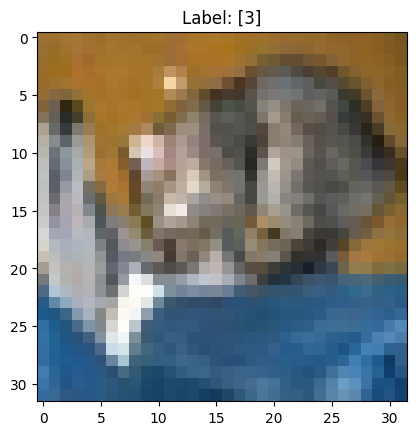

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)
Classes: [0 1 2 3 4 5 6 7 8 9]
Class counts: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [ ]:
# Select the first image from the dataset to check the pixel size
image_index = 0
selected_image = test_images[image_index]

# Print the pixel values
print("Pixel values of the selected image:", selected_image)

# Display the selected image
plt.imshow(selected_image)
plt.title(f"Label: {test_labels[image_index]}")
plt.show()

# Check images and their shapes
print(f"Training data shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing data shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

# Check the unique classes and their counts
unique_classes, class_counts = np.unique(train_labels, return_counts=True)
print(f"Classes: {unique_classes}")
print(f"Class counts: {class_counts}")

In [ ]:
# Normalize pixel and convert to datatype
train_images = (train_images / 255.0).astype(np.float32)
test_images = (test_images / 255.0).astype(np.float32)

train_labels = (train_labels).astype(np.int64)
train_labels = (train_labels).astype(np.int64)

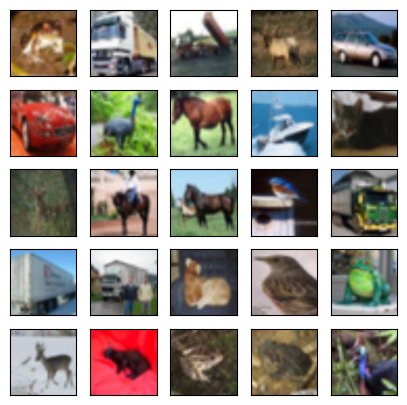

In [ ]:
# Resize images to 100x100
resized_train_images = np.array([tf.image.resize(image, (100, 100)).numpy() for image in train_images[:25]])

# Plot 25 example images
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(resized_train_images[i])
plt.show()

## Neural network architecture
* CNN


In [ ]:
# Define the fully connected model where the batch normalization replaces the

def build_cnn_model(learning_rate=0.002):
    cnn_model = models.Sequential([

        # Define convolutional layer nbr.1
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),


        # Define convolutional layer nbr.2
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        # Define convolutional layer nbr.3
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        # Flatten and Dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')

    ])

    return cnn_model

cnn_model = build_cnn_model(learning_rate=0.002)

# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 15, 15, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                      



### Compile and train the model


In [ ]:

# Define the optimizer with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#add early stop

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

epoch_size = 20
history = cnn_model.fit(train_images, train_labels, epochs=epoch_size,
    validation_data=(test_images, test_labels), callbacks=[early_stop])




Epoch 1/20
1563/1563 [==============================] - 15s 8ms/step - loss: 1.4560 - accuracy: 0.4900 - val_loss: 1.1231 - val_accuracy: 0.6014
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0532 - accuracy: 0.6286 - val_loss: 1.0242 - val_accuracy: 0.6423
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9066 - accuracy: 0.6864 - val_loss: 0.9324 - val_accuracy: 0.6735
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8084 - accuracy: 0.7169 - val_loss: 0.8892 - val_accuracy: 0.6982
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7328 - accuracy: 0.7449 - val_loss: 0.7935 - val_accuracy: 0.7299
Epoch 6/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6716 - accuracy: 0.7644 - val_loss: 0.8164 - val_accuracy: 0.7216
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6249 - accuracy: 0.7816 - val_loss: 0.8933 - val_acc

In [ ]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 15, 15, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                      

In [ ]:
# Attempt 1: add drop-out and additional layer -> BEST RESULT (ALSO TESTED WITH LOWER LEARNING BUT THAT FORGOT TO LOG)

# def build_cnn_model(learning_rate=0.001):
#     cnn_model = models.Sequential([

#         # Define convolutional layer nbr.1
#         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),


#         # Define convolutional layer nbr.2
#         layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),

#         # Define convolutional layer nbr.3
#         layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),

#         # Flatten and Dense layers
#         layers.Flatten(),
#         layers.Dense(128, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(10, activation='softmax')

#     ])

#     return cnn_model

# cnn_model = build_cnn_model(learning_rate=0.001)

# # Print the summary of the layers in the model.
# print(cnn_model.summary())

# Epoch 1/20
# 1563/1563 [==============================] - 147s 92ms/step - loss: 1.5463 - accuracy: 0.4605 - val_loss: 1.1964 - val_accuracy: 0.5743
# Epoch 2/20
# 1563/1563 [==============================] - 142s 91ms/step - loss: 1.1450 - accuracy: 0.5964 - val_loss: 1.0278 - val_accuracy: 0.6349
# Epoch 3/20
# 1563/1563 [==============================] - 153s 98ms/step - loss: 0.9817 - accuracy: 0.6575 - val_loss: 0.9127 - val_accuracy: 0.6825
# Epoch 4/20
# 1563/1563 [==============================] - 138s 88ms/step - loss: 0.8843 - accuracy: 0.6922 - val_loss: 0.9263 - val_accuracy: 0.6822
# Epoch 5/20
# 1563/1563 [==============================] - 138s 88ms/step - loss: 0.7983 - accuracy: 0.7221 - val_loss: 0.8320 - val_accuracy: 0.7145
# Epoch 6/20
# 1563/1563 [==============================] - 143s 92ms/step - loss: 0.7356 - accuracy: 0.7423 - val_loss: 1.0150 - val_accuracy: 0.6640
# Epoch 7/20
# 1563/1563 [==============================] - 148s 94ms/step - loss: 0.6883 - accuracy: 0.7614 - val_loss: 0.8087 - val_accuracy: 0.7263
# Epoch 8/20
# 1563/1563 [==============================] - 141s 90ms/step - loss: 0.6357 - accuracy: 0.7776 - val_loss: 0.9706 - val_accuracy: 0.6894
# Epoch 9/20
# 1563/1563 [==============================] - 140s 89ms/step - loss: 0.5927 - accuracy: 0.7927 - val_loss: 0.8185 - val_accuracy: 0.7320
# Epoch 10/20
# 1563/1563 [==============================] - 143s 92ms/step - loss: 0.5629 - accuracy: 0.8034 - val_loss: 0.7976 - val_accuracy: 0.7338
# Epoch 11/20
# 1563/1563 [==============================] - 146s 94ms/step - loss: 0.5308 - accuracy: 0.8140 - val_loss: 0.8068 - val_accuracy: 0.7404
# Epoch 12/20
# 1563/1563 [==============================] - 144s 92ms/step - loss: 0.5010 - accuracy: 0.8228 - val_loss: 0.8088 - val_accuracy: 0.7441
# Epoch 13/20
# ...
# Epoch 19/20
# 1563/1563 [==============================] - 150s 96ms/step - loss: 0.3593 - accuracy: 0.8726 - val_loss: 1.0348 - val_accuracy: 0.7259
# Epoch 20/20
# 1563/1563 [==============================] - 214s 137ms/step - loss: 0.3505 - accuracy: 0.8765 - val_loss: 0.9595 - val_accuracy: 0.7309

### Evaluate accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test data
test_predictions = cnn_model.predict(test_images)
test_predictions_classes = tf.argmax(test_predictions, axis=1).numpy()

# Add labels
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Calculate metrics
accuracy = accuracy_score(test_labels, test_predictions_classes)
precision = precision_score(test_labels, test_predictions_classes, average='weighted')
recall = recall_score(test_labels, test_predictions_classes, average='weighted')
f1 = f1_score(test_labels, test_predictions_classes, average='weighted')
classification_rep = classification_report(test_labels, test_predictions_classes, target_names=label_names)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{classification_rep}')


313/313 [==============================] - 1s 2ms/step
Accuracy: 0.7446
Precision: 0.7517972128563107
Recall: 0.7446
F1 Score: 0.7467254999132825
Classification Report:
              precision    recall  f1-score   support

    airplane       0.72      0.83      0.77      1000
  automobile       0.91      0.79      0.84      1000
        bird       0.66      0.65      0.65      1000
         cat       0.56      0.60      0.58      1000
        deer       0.69      0.76      0.72      1000
         dog       0.63      0.66      0.64      1000
        frog       0.83      0.80      0.81      1000
       horse       0.81      0.76      0.79      1000
        ship       0.85      0.81      0.83      1000
       truck       0.85      0.79      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.75     10000
weighted avg       0.75      0.74      0.75     10000



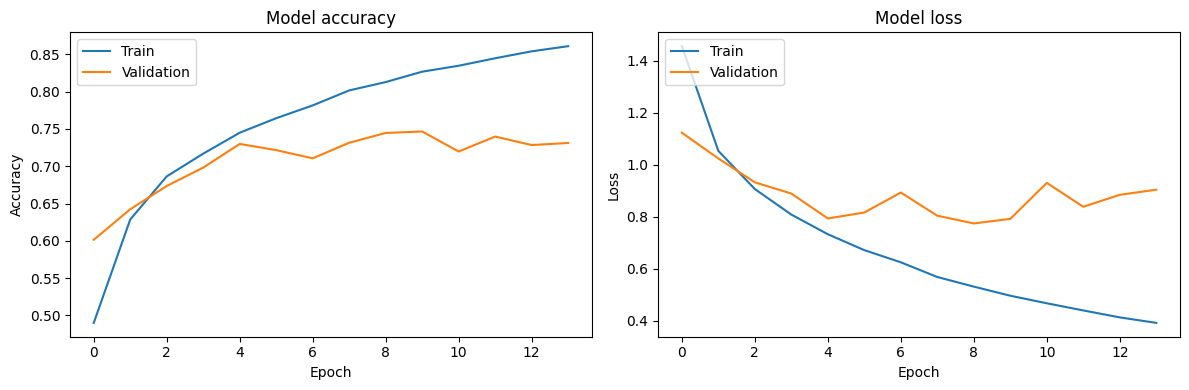

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

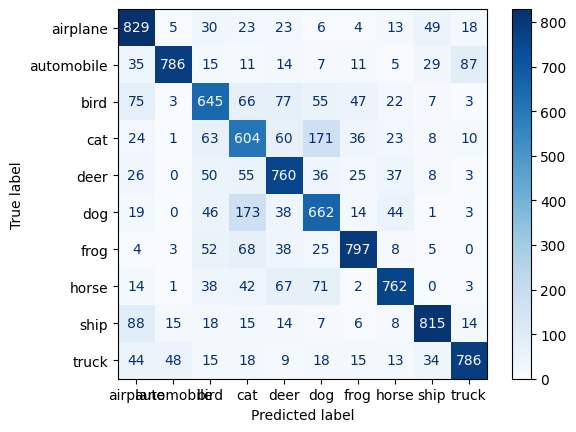

In [ ]:


# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()